Site to Database: https://www.ncbi.nlm.nih.gov/geo/

Specify directory for where to store Differential Gene Expression Data

In [28]:
microarray_diff_exp_data <- "/Users/rogervargas/OneDrive - Bill & Melinda Gates Medical Research Institute/Projects/Biomarkers/Data/Microarray Differential Gene Expression/ATB_v_LTBI/"
RNAseq_diff_exp_data <- "/Users/rogervargas/OneDrive - Bill & Melinda Gates Medical Research Institute/Projects/Biomarkers/Data/RNAseq Differential Gene Expression/ATB_v_LTBI/"

# **Microarray Data**

## Dataset 1

### GSE19491: GSE19439: Blood Transcriptional Profiles in Active and Latent Tuberculosis UK (microarray, GPL6947)

- Subjects:42 
- Disease status: PTB (Active Pulmonary TB) (n=13), Latent (n=17), Control (BCG+)(n=6), Control (BCG-)(n=6)
- Disease status definition: PTB-isolation of Mycobacterium Tuberculosis on culture of sputum or bronchoalvelolar lavage fluid. Latent-positive by tuberculin skin test (>14mm if BCG vaccinated, >5mm if not vaccinated) and were also positive by Interferon-Gamma Release assay(IGRA). Control :negative for both assays.

Compare ATB (**n=13**) to LTBI (**n=17**)

In [8]:
CSV_filename <- "GSE19439.csv"

#### Check distribution of expression values across samples

Found 1 file(s)
GSE19439_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV2EJkl/GSE19439_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.


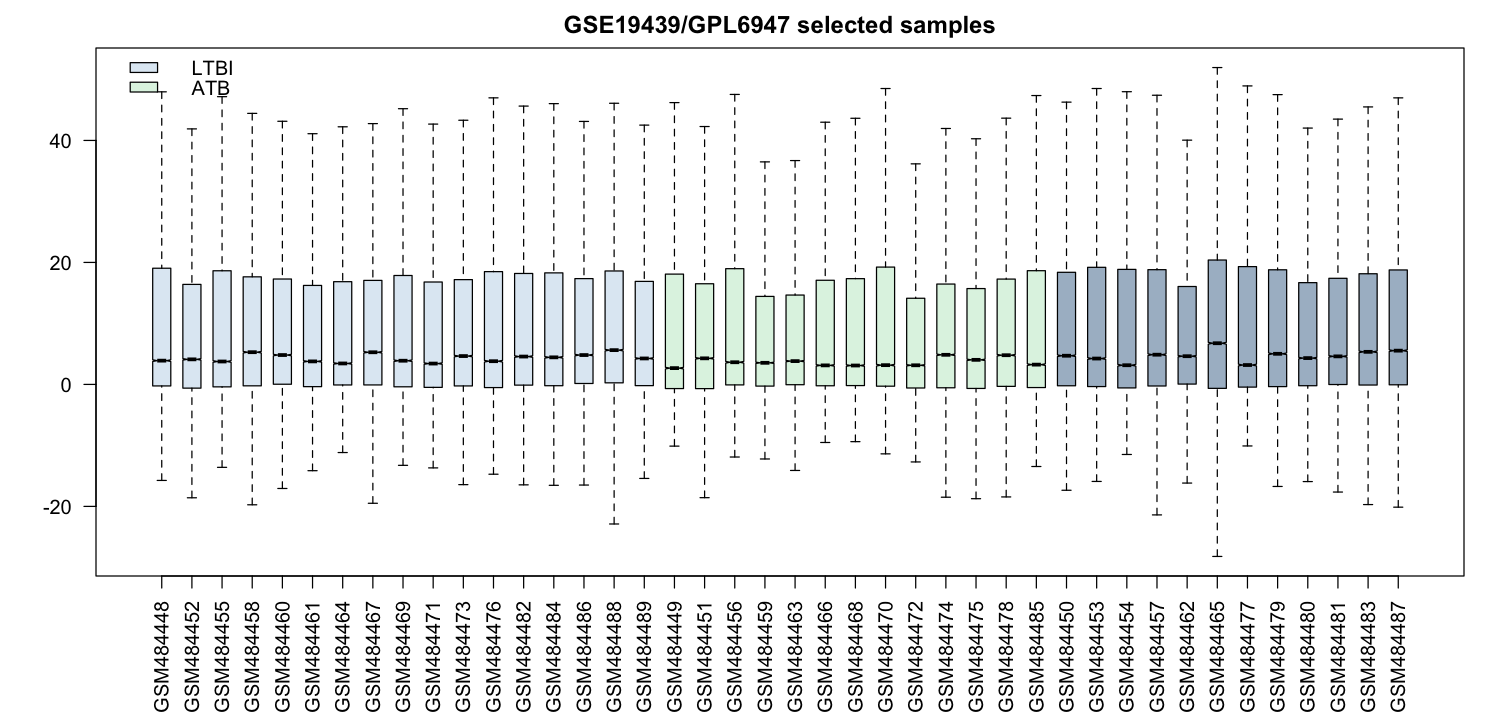

In [9]:
################################################################
#   Boxplot for selected GEO samples
library(Biobase)
library(GEOquery)
library(repr)

# load series and platform data from GEO

gset <- getGEO("GSE19439", GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL6947", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
gsms <- "01X10XX01X0100X10X10101010110X1XXX0X010X00"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)
labels <- c("LTBI","ATB")

# set parameters and draw the plot
palette(c("#dfeaf4","#dff4e4", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste ("GSE19439", '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

#### Run differential expression analysis between sample groups and export results as CSV file

In [10]:
# Version info: R 3.2.3, Biobase 2.30.0, GEOquery 2.40.0, limma 3.26.8
# R scripts generated  Wed Jun 10 01:05:12 EDT 2020

################################################################
#   Differential expression analysis with limma
library(Biobase)
library(GEOquery)
library(limma)

# load series and platform data from GEO

gset <- getGEO("GSE19439", GSEMatrix =TRUE, AnnotGPL=TRUE)
if (length(gset) > 1) idx <- grep("GPL6947", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# make proper column names to match toptable 
fvarLabels(gset) <- make.names(fvarLabels(gset))

# group names for all samples
gsms <- "01X10XX01X0100X10X10101010110X1XXX0X010X00"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# log2 transform
ex <- exprs(gset)
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
          (qx[6]-qx[1] > 50 && qx[2] > 0) ||
          (qx[2] > 0 && qx[2] < 1 && qx[4] > 1 && qx[4] < 2)
if (LogC) { ex[which(ex <= 0)] <- NaN
  exprs(gset) <- log2(ex) }

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names
fl <- as.factor(sml)
gset$description <- fl
design <- model.matrix(~ description + 0, gset)
colnames(design) <- levels(fl)
fit <- lmFit(gset, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

write.csv(tT, paste(microarray_diff_exp_data , CSV_filename, sep=""))

Found 1 file(s)
GSE19439_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV2EJkl/GSE19439_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL6947 found here:
/var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV2EJkl/GPL6947.annot.gz 
Warning message:
“Partial NA coefficients for 633 probe(s)”

## Dataset 2

### GSE19491: GSE19442:	Blood Transcriptional Profiles of TB in South Africa (microarray, GPL6947)

- Subjects:51
- Disease status: PTB (n=20), LATENT TB (n=31)
- Disease status definition: same as above

Compare ATB (**n=20**) to LTBI (**n=31**)

In [11]:
CSV_filename <- "GSE19442.csv"

#### Check distribution of expression values across samples

Found 1 file(s)
GSE19442_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV2EJkl/GSE19442_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.


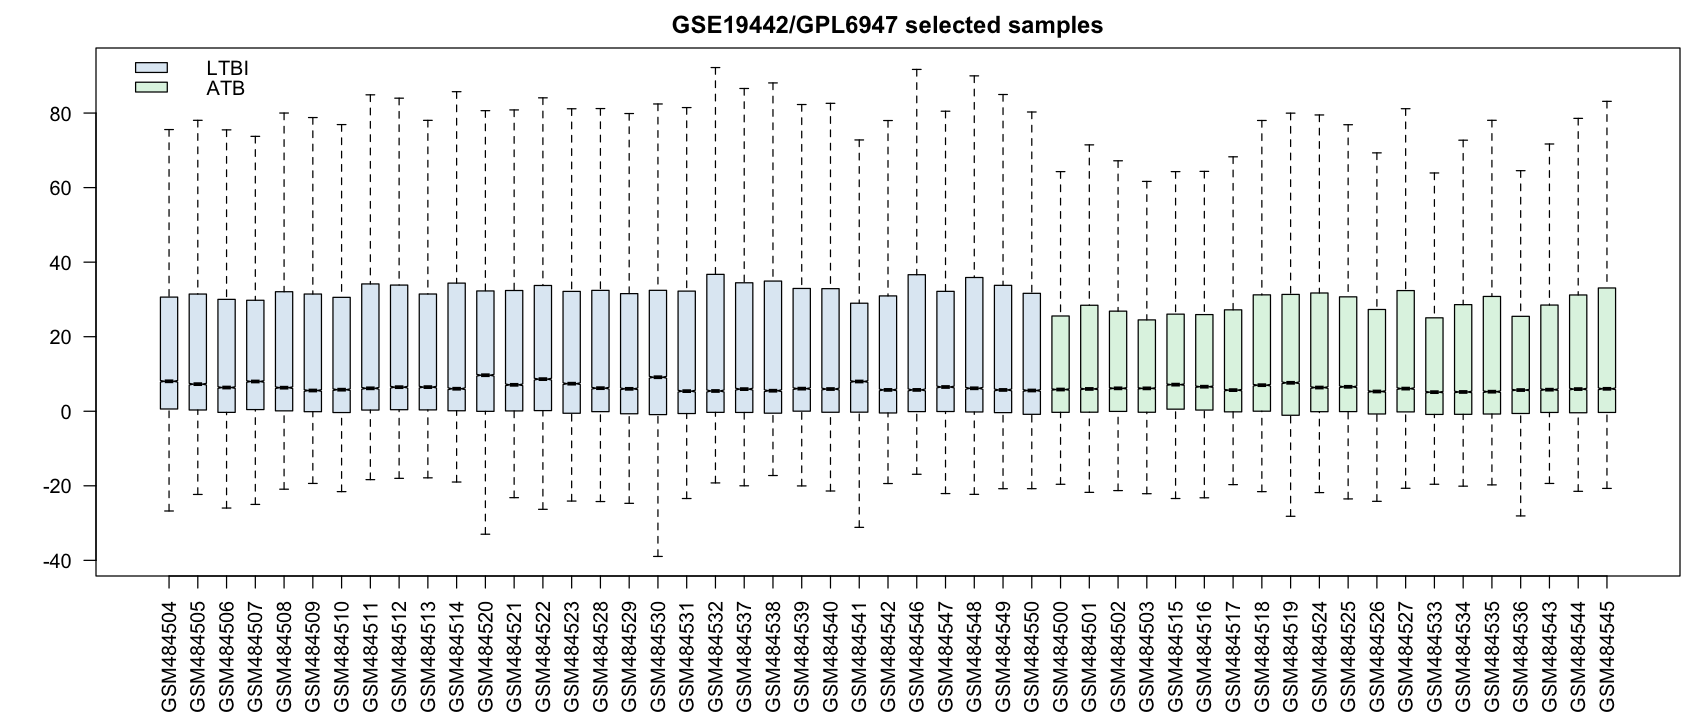

In [12]:
################################################################
#   Boxplot for selected GEO samples
library(Biobase)
library(GEOquery)
library(repr)

# load series and platform data from GEO

gset <- getGEO("GSE19442", GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL6947", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
gsms <- "111100000000000111110000111100000111100000011100000"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)
labels <- c("LTBI","ATB")

# set parameters and draw the plot
palette(c("#dfeaf4","#dff4e4", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste ("GSE19442", '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

#### Run differential expression analysis between sample groups and export results as CSV file

In [13]:
# Version info: R 3.2.3, Biobase 2.30.0, GEOquery 2.40.0, limma 3.26.8
# R scripts generated  Wed Jun 10 01:16:58 EDT 2020

################################################################
#   Differential expression analysis with limma
library(Biobase)
library(GEOquery)
library(limma)

# load series and platform data from GEO

gset <- getGEO("GSE19442", GSEMatrix =TRUE, AnnotGPL=TRUE)
if (length(gset) > 1) idx <- grep("GPL6947", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# make proper column names to match toptable 
fvarLabels(gset) <- make.names(fvarLabels(gset))

# group names for all samples
gsms <- "111100000000000111110000111100000111100000011100000"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# log2 transform
ex <- exprs(gset)
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
          (qx[6]-qx[1] > 50 && qx[2] > 0) ||
          (qx[2] > 0 && qx[2] < 1 && qx[4] > 1 && qx[4] < 2)
if (LogC) { ex[which(ex <= 0)] <- NaN
  exprs(gset) <- log2(ex) }

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names
fl <- as.factor(sml)
gset$description <- fl
design <- model.matrix(~ description + 0, gset)
colnames(design) <- levels(fl)
fit <- lmFit(gset, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

write.csv(tT, paste(microarray_diff_exp_data , CSV_filename, sep=""))

Found 1 file(s)
GSE19442_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV2EJkl/GSE19442_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL6947 found here:
/var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV2EJkl/GPL6947.annot.gz 
Warning message:
“Partial NA coefficients for 286 probe(s)”

## Dataset 3

### GSE19491: GSE19444: Blood Transcriptional Profiles of Active and Latent TB UK (microarray, GPL6947)

- Subjects:54
- Disease status: PTB (n=21), Latent (n=21), Control (BCG+) (n=12)
- Disease status definition: same as above

Compare ATB (**n=21**) to LTBI (**n=21**)

In [14]:
CSV_filename <- "GSE19444.csv"

#### Check distribution of expression values across samples

Found 1 file(s)
GSE19444_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.


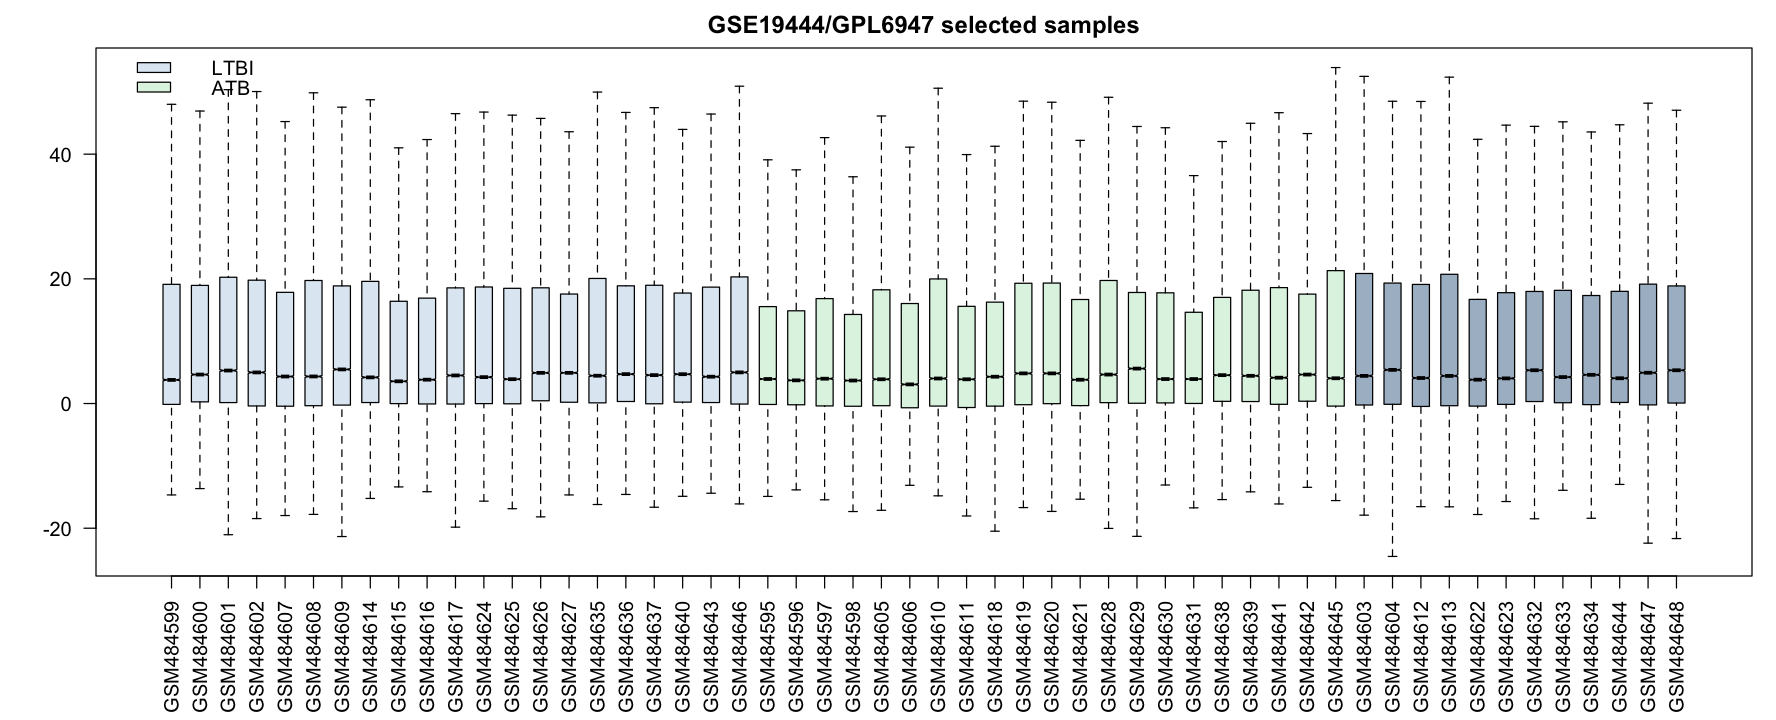

In [15]:
################################################################
#   Boxplot for selected GEO samples
library(Biobase)
library(GEOquery)
library(repr)

# load series and platform data from GEO

gset <- getGEO("GSE19444", GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL6947", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
gsms <- "11110000XX1100011XX00001111XX00001111XXX000110110X10XX"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)
labels <- c("LTBI","ATB")

# set parameters and draw the plot
palette(c("#dfeaf4","#dff4e4", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste ("GSE19444", '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

#### Run differential expression analysis between sample groups and export results as CSV file

In [16]:
# Version info: R 3.2.3, Biobase 2.30.0, GEOquery 2.40.0, limma 3.26.8
# R scripts generated  Wed Jun 10 01:31:40 EDT 2020

################################################################
#   Differential expression analysis with limma
library(Biobase)
library(GEOquery)
library(limma)

# load series and platform data from GEO

gset <- getGEO("GSE19444", GSEMatrix =TRUE, AnnotGPL=TRUE)
if (length(gset) > 1) idx <- grep("GPL6947", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# make proper column names to match toptable 
fvarLabels(gset) <- make.names(fvarLabels(gset))

# group names for all samples
gsms <- "11110000XX1100011XX00001111XX00001111XXX000110110X10XX"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# log2 transform
ex <- exprs(gset)
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
          (qx[6]-qx[1] > 50 && qx[2] > 0) ||
          (qx[2] > 0 && qx[2] < 1 && qx[4] > 1 && qx[4] < 2)
if (LogC) { ex[which(ex <= 0)] <- NaN
  exprs(gset) <- log2(ex) }

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names
fl <- as.factor(sml)
gset$description <- fl
design <- model.matrix(~ description + 0, gset)
colnames(design) <- levels(fl)
fit <- lmFit(gset, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

write.csv(tT, paste(microarray_diff_exp_data , CSV_filename, sep=""))

Found 1 file(s)
GSE19444_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV2EJkl/GSE19444_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL6947 found here:
/var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV2EJkl/GPL6947.annot.gz 
Warning message:
“Partial NA coefficients for 130 probe(s)”

## Dataset 4

### GSE28623: The Gambia, West Africa (microarray, GPL4133)

- Subjects:108
- Disease status: TB (n=46), LTBI(skin test >= 10mm)(n=25), NID(skin test = 0mm)(n=37)
- Disease status definition: TB patients showed sputum smear and chest x-ray positive. LTBI with Mantoux test induration (skin test) >= 10mm. Control with Mantoux test induration (skin test) = 0mm

Compare ATB (**n=46**) to LTBI (**n=25**)

In [2]:
CSV_filename <- "GSE28623.csv"

#### Check distribution of expression values across samples

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite B

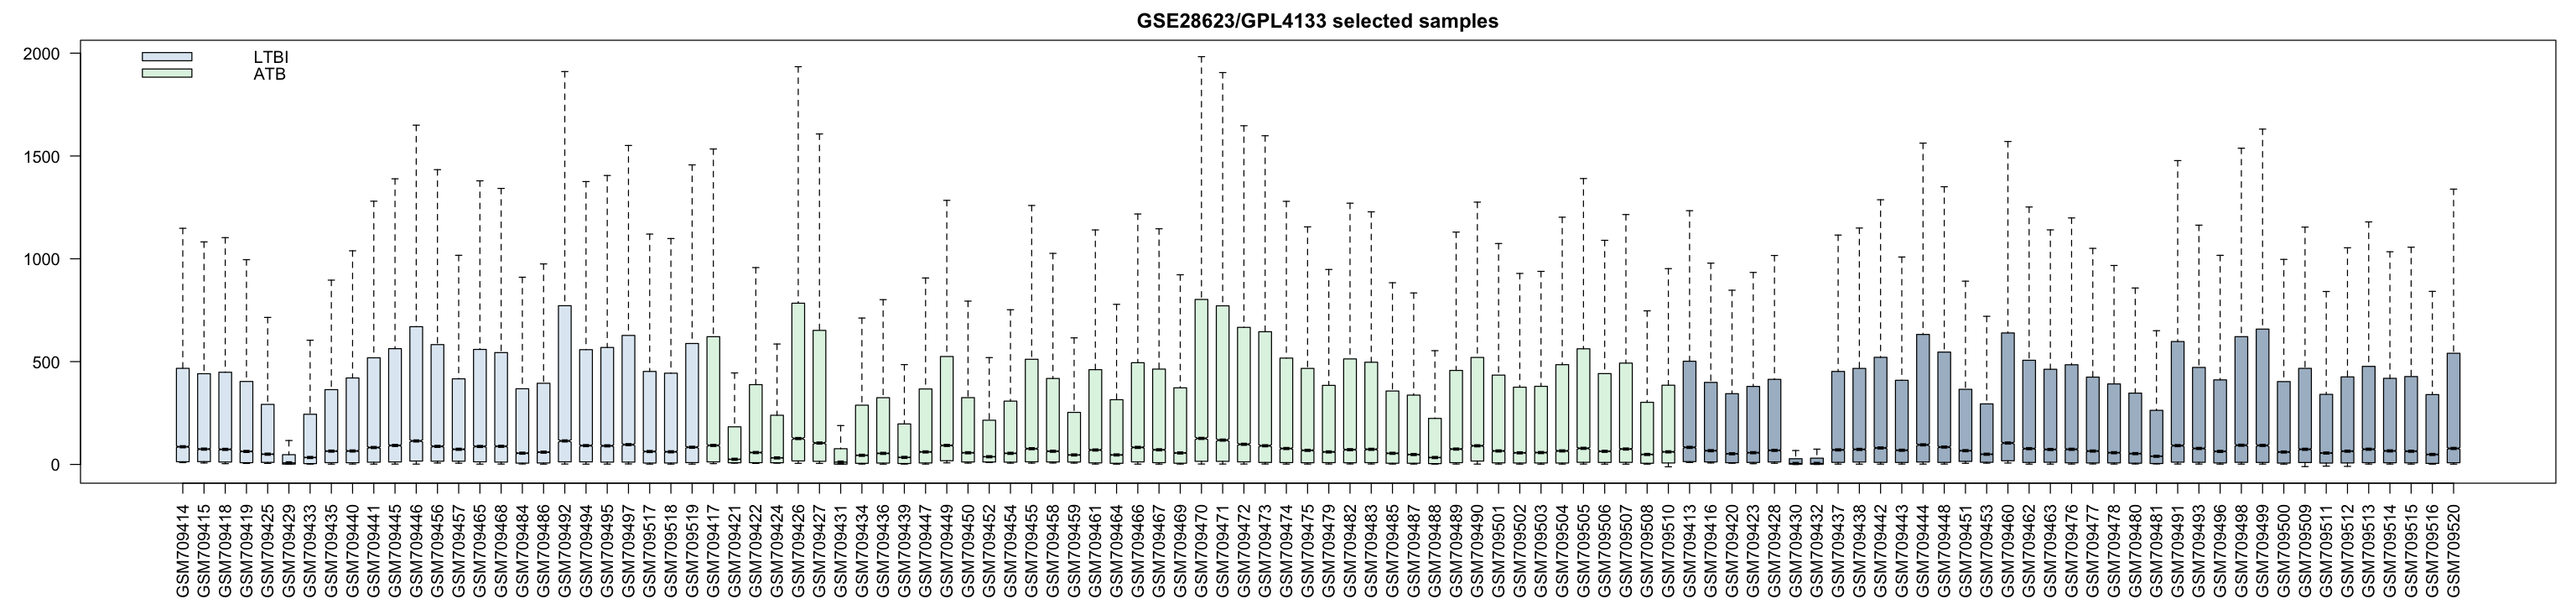

In [3]:
################################################################
#   Boxplot for selected GEO samples
library(Biobase)
library(GEOquery)
library(repr)

# load series and platform data from GEO

gset <- getGEO("GSE28623", GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL4133", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
gsms <- paste0("X00X100X11X1011X0X1X0101XX100XXX001X11X1X110011X1X",
        "X101101111111XXX1XX110101111X0X00X0XXX11111111X1XX",
        "XXXX000X")
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)
labels <- c("LTBI","ATB")

# set parameters and draw the plot
palette(c("#dfeaf4","#dff4e4", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste ("GSE28623", '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

#### Run differential expression analysis between sample groups and export results as CSV file

In [4]:
# Version info: R 3.2.3, Biobase 2.30.0, GEOquery 2.40.0, limma 3.26.8
# R scripts generated  Wed Jun 10 12:23:21 EDT 2020

################################################################
#   Differential expression analysis with limma
library(Biobase)
library(GEOquery)
library(limma)

# load series and platform data from GEO

gset <- getGEO("GSE28623", GSEMatrix =TRUE, AnnotGPL=TRUE)
if (length(gset) > 1) idx <- grep("GPL4133", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# make proper column names to match toptable 
fvarLabels(gset) <- make.names(fvarLabels(gset))

# group names for all samples
gsms <- paste0("X00X100X11X1011X0X1X0101XX100XXX001X11X1X110011X1X",
        "X101101111111XXX1XX110101111X0X00X0XXX11111111X1XX",
        "XXXX000X")
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# log2 transform
ex <- exprs(gset)
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
          (qx[6]-qx[1] > 50 && qx[2] > 0) ||
          (qx[2] > 0 && qx[2] < 1 && qx[4] > 1 && qx[4] < 2)
if (LogC) { ex[which(ex <= 0)] <- NaN
  exprs(gset) <- log2(ex) }

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names
fl <- as.factor(sml)
gset$description <- fl
design <- model.matrix(~ description + 0, gset)
colnames(design) <- levels(fl)
fit <- lmFit(gset, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

write.csv(tT, paste(microarray_diff_exp_data , CSV_filename, sep=""))


Attaching package: ‘limma’

The following object is masked from ‘package:BiocGenerics’:

    plotMA

Found 1 file(s)
GSE28623_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GSE28623_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.
File stored at: 
/var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GPL4133.annot.gz


## Dataset 5

### GSE37250 Cape Town, South Africa (n=300) and Karonga, Malawi (n=237) (microarray, GPL10558)

- Subjects:537
- Disease status: active tuberculosis (n=195), latent TB infection (n=167), other disease (n=175)
- Disease stage (the second layer): HIV positive (n=274) and negative (n=263)
- Disease status definition: active TB (TB) compared to latent TB infection (LTBI) as well as to other diseases (OD)

Compare ATB (**n=195**) to LTBI (**n=167**)

In [5]:
CSV_filename <- "GSE37250.csv"

#### Check distribution of expression values across samples

Found 1 file(s)
GSE37250_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GSE37250_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.


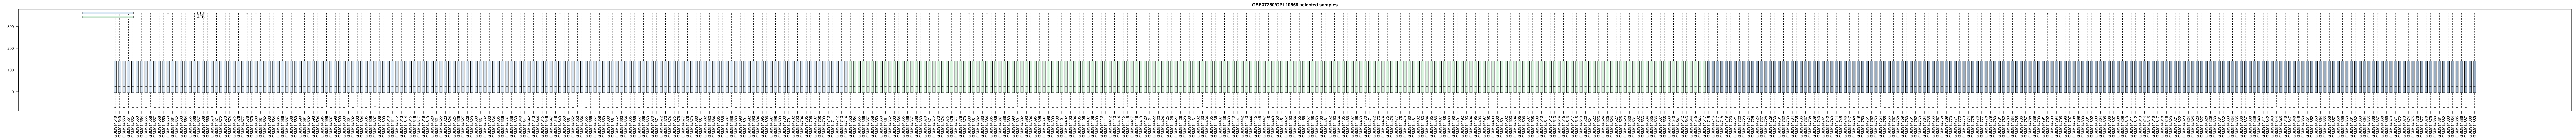

In [8]:
################################################################
#   Boxplot for selected GEO samples
library(Biobase)
library(GEOquery)
library(repr)

# load series and platform data from GEO

gset <- getGEO("GSE37250", GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL10558", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
gsms <- paste0("11111111111111111111111111111111111111111111111111",
        "11111111111111111111111111111111111111111111111111",
        "11111111111111111111111111111111111111111111111111",
        "11111111111111111111111111111111111111111111100000",
        "00000000000000000000000000000000000000000000000000",
        "00000000000000000000000000000000000000000000000000",
        "00000000000000000000000000000000000000000000000000",
        "000000000000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)
labels <- c("LTBI","ATB")

# set parameters and draw the plot
palette(c("#dfeaf4","#dff4e4", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste ("GSE37250", '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

#### Run differential expression analysis between sample groups and export results as CSV file

In [9]:
# Version info: R 3.2.3, Biobase 2.30.0, GEOquery 2.40.0, limma 3.26.8
# R scripts generated  Wed Jun 10 14:53:07 EDT 2020

################################################################
#   Differential expression analysis with limma
library(Biobase)
library(GEOquery)
library(limma)

# load series and platform data from GEO

gset <- getGEO("GSE37250", GSEMatrix =TRUE, AnnotGPL=TRUE)
if (length(gset) > 1) idx <- grep("GPL10558", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# make proper column names to match toptable 
fvarLabels(gset) <- make.names(fvarLabels(gset))

# group names for all samples
gsms <- paste0("11111111111111111111111111111111111111111111111111",
        "11111111111111111111111111111111111111111111111111",
        "11111111111111111111111111111111111111111111111111",
        "11111111111111111111111111111111111111111111100000",
        "00000000000000000000000000000000000000000000000000",
        "00000000000000000000000000000000000000000000000000",
        "00000000000000000000000000000000000000000000000000",
        "000000000000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# log2 transform
ex <- exprs(gset)
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
          (qx[6]-qx[1] > 50 && qx[2] > 0) ||
          (qx[2] > 0 && qx[2] < 1 && qx[4] > 1 && qx[4] < 2)
if (LogC) { ex[which(ex <= 0)] <- NaN
  exprs(gset) <- log2(ex) }

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names
fl <- as.factor(sml)
gset$description <- fl
design <- model.matrix(~ description + 0, gset)
colnames(design) <- levels(fl)
fit <- lmFit(gset, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

write.csv(tT, paste(microarray_diff_exp_data , CSV_filename, sep=""))

Found 1 file(s)
GSE37250_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GSE37250_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
File stored at: 
/var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GPL10558.annot.gz
Warning message:
“13 parsing failures.
  row     col               expected          actual         file
29686 Gene ID no trailing characters ///283507       literal data
29841 Gene ID no trailing characters ///2074         literal data
30401 Gene ID no trailing characters ///27185///7257 literal data
31184 Gene ID no trailing characters ///57592        literal data
31271 Gene ID no trailing characters ///3199         literal data
..... ....... ...................... ............... ............
See problems(...) for more details.
”Warning message:
“Partial NA coefficients for 856 probe(s

## Dataset 6

### GSE39939 A paediatric cohort from Kenya with HIV+/- (microarray, GPL10558)

- Subjects:157
- Disease status: active tuberculosis (culture confirmed) (n=35), other disease (n=55), latent TB infection (n=14), active tuberculosis (culture negative)(n=44), other disease (IGRA +)(n=9)
- Disease stage (the second layer): HIV positive (n=274) and negative (n=263)
- Disease status definition: active TB (culture confirmed), active TB (culture negative), LTBI or other disease

Compare ATB (**n=79**) to LTBI (**n=14**)

In [13]:
CSV_filename <- "GSE39939.csv"

#### Check distribution of expression values across samples

Found 1 file(s)
GSE39939_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.


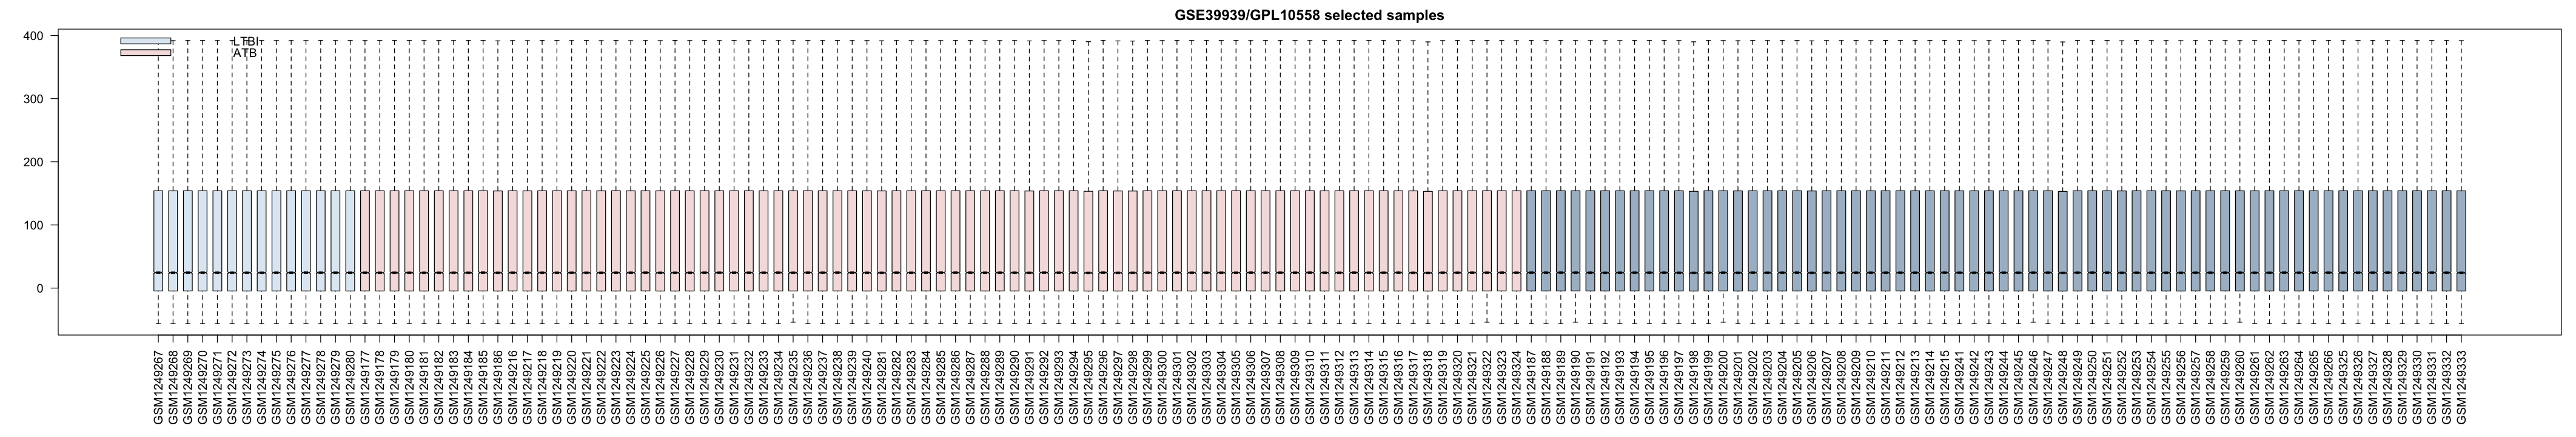

In [14]:
################################################################
#   Boxplot for selected GEO samples
library(Biobase)
library(GEOquery)
library(repr)

# load series and platform data from GEO

gset <- getGEO("GSE39939", GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL10558", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
gsms <- paste0("1111111111XXXXXXXXXXXXXXXXXXXXXXXXXXXXX11111111111",
        "11111111111111XXXXXXXXXXXXXXXXXXXXXXXXXX0000000000",
        "000011111111111111111111111111111111111111111111XX",
        "XXXXXXX")
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)
labels <- c("LTBI","ATB")

# set parameters and draw the plot
palette(c("#dfeaf4","#f4dfdf", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste ("GSE39939", '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

#### Run differential expression analysis between sample groups and export results as CSV file

In [15]:
# Version info: R 3.2.3, Biobase 2.30.0, GEOquery 2.40.0, limma 3.26.8
# R scripts generated  Wed Jun 10 18:09:39 EDT 2020

################################################################
#   Differential expression analysis with limma
library(Biobase)
library(GEOquery)
library(limma)

# load series and platform data from GEO

gset <- getGEO("GSE39939", GSEMatrix =TRUE, AnnotGPL=TRUE)
if (length(gset) > 1) idx <- grep("GPL10558", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# make proper column names to match toptable 
fvarLabels(gset) <- make.names(fvarLabels(gset))

# group names for all samples
gsms <- paste0("1111111111XXXXXXXXXXXXXXXXXXXXXXXXXXXXX11111111111",
        "11111111111111XXXXXXXXXXXXXXXXXXXXXXXXXX0000000000",
        "000011111111111111111111111111111111111111111111XX",
        "XXXXXXX")
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# log2 transform
ex <- exprs(gset)
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
          (qx[6]-qx[1] > 50 && qx[2] > 0) ||
          (qx[2] > 0 && qx[2] < 1 && qx[4] > 1 && qx[4] < 2)
if (LogC) { ex[which(ex <= 0)] <- NaN
  exprs(gset) <- log2(ex) }

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names
fl <- as.factor(sml)
gset$description <- fl
design <- model.matrix(~ description + 0, gset)
colnames(design) <- levels(fl)
fit <- lmFit(gset, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

write.csv(tT, paste(microarray_diff_exp_data , CSV_filename, sep=""))

Found 1 file(s)
GSE39939_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GSE39939_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL10558 found here:
/var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GPL10558.annot.gz 
Warning message:
“13 parsing failures.
  row     col               expected          actual         file
29686 Gene ID no trailing characters ///283507       literal data
29841 Gene ID no trailing characters ///2074         literal data
30401 Gene ID no trailing characters ///27185///7257 literal data
31184 Gene ID no trailing characters ///57592        literal data
31271 Gene ID no trailing characters ///3199         literal data
..... ....... ...................... ............... ............
See problems(...) for more details.
”Warning message:
“Pa

## Dataset 7

### GSE39940 Cape Town, South Africa (n=157) and Blantyre, Malawi (n=177) (microarray, GPL10558)

- Subjects:334
- Disease status: active tuberculosis (n=111), latent TB infection (n=54), other disease (n=169)
- Disease stage (the second layer): HIV positive (n=107) and negative (n=227)
- Disease status definition: active TB (TB) compared to latent TB infection (LTBI) as well as to other diseases (OD)

Compare ATB (**n=111**) to LTBI (**n=54**)

In [19]:
CSV_filename <- "GSE39940.csv"

#### Check distribution of expression values across samples

Found 1 file(s)
GSE39940_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.


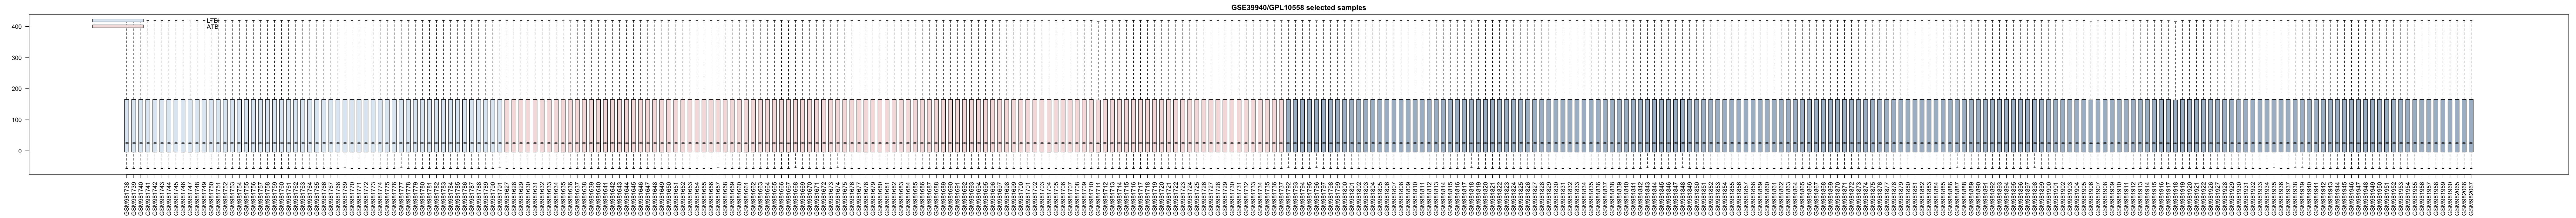

In [18]:
################################################################
#   Boxplot for selected GEO samples
library(Biobase)
library(GEOquery)
library(repr)

# load series and platform data from GEO

gset <- getGEO("GSE39940", GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL10558", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
gsms <- paste0("11111111111111111111111111111111111111111111111111",
        "11111111111111111111111111111111111111111111111111",
        "11111111111000000000000000000000000000000000000000",
        "000000000000000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)
labels <- c("LTBI","ATB")

# set parameters and draw the plot
palette(c("#dfeaf4","#f4dfdf", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste ("GSE39940", '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

#### Run differential expression analysis between sample groups and export results as CSV file

In [20]:
# Version info: R 3.2.3, Biobase 2.30.0, GEOquery 2.40.0, limma 3.26.8
# R scripts generated  Wed Jun 10 18:14:30 EDT 2020

################################################################
#   Differential expression analysis with limma
library(Biobase)
library(GEOquery)
library(limma)

# load series and platform data from GEO

gset <- getGEO("GSE39940", GSEMatrix =TRUE, AnnotGPL=TRUE)
if (length(gset) > 1) idx <- grep("GPL10558", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# make proper column names to match toptable 
fvarLabels(gset) <- make.names(fvarLabels(gset))

# group names for all samples
gsms <- paste0("11111111111111111111111111111111111111111111111111",
        "11111111111111111111111111111111111111111111111111",
        "11111111111000000000000000000000000000000000000000",
        "000000000000000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# log2 transform
ex <- exprs(gset)
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
          (qx[6]-qx[1] > 50 && qx[2] > 0) ||
          (qx[2] > 0 && qx[2] < 1 && qx[4] > 1 && qx[4] < 2)
if (LogC) { ex[which(ex <= 0)] <- NaN
  exprs(gset) <- log2(ex) }

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names
fl <- as.factor(sml)
gset$description <- fl
design <- model.matrix(~ description + 0, gset)
colnames(design) <- levels(fl)
fit <- lmFit(gset, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

write.csv(tT, paste(microarray_diff_exp_data , CSV_filename, sep=""))

Found 1 file(s)
GSE39940_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GSE39940_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL10558 found here:
/var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GPL10558.annot.gz 
Warning message:
“13 parsing failures.
  row     col               expected          actual         file
29686 Gene ID no trailing characters ///283507       literal data
29841 Gene ID no trailing characters ///2074         literal data
30401 Gene ID no trailing characters ///27185///7257 literal data
31184 Gene ID no trailing characters ///57592        literal data
31271 Gene ID no trailing characters ///3199         literal data
..... ....... ...................... ............... ............
See problems(...) for more details.
”Warning message:
“Pa

## Dataset 8

### GSE41055 Venezuela, Warao Amerindian children (microarray, GPL5175)

- Subjects:27
- Disease status: whole blood, active TB infection (n=9), whole blood, latent TB infection (n=9), whole blood, healthy control (n=9)
- Disease status definition: children 1 to 15 years of age, HIV-negative. LTBI was defined as a TST = 10mm and a positive QFT-GIT with a negative culture result on inclusion in the absence of radiological and clinical evidence of TB disease on inclusion as well as on t=6 and t=12 months. HC were children with a TST = 0 mm at inclusion and at t=6 and t=12 months and a negative QFT-GIT and a negative culture result at inclusion without radiological or clinical evidence of TB disease on inclusion nor on t=6 and t=12 months. 

Compare ATB (**n=9**) to LTBI (**n=9**)

In [24]:
CSV_filename <- "GSE41055.csv"

#### Check distribution of expression values across samples

Found 1 file(s)
GSE41055_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


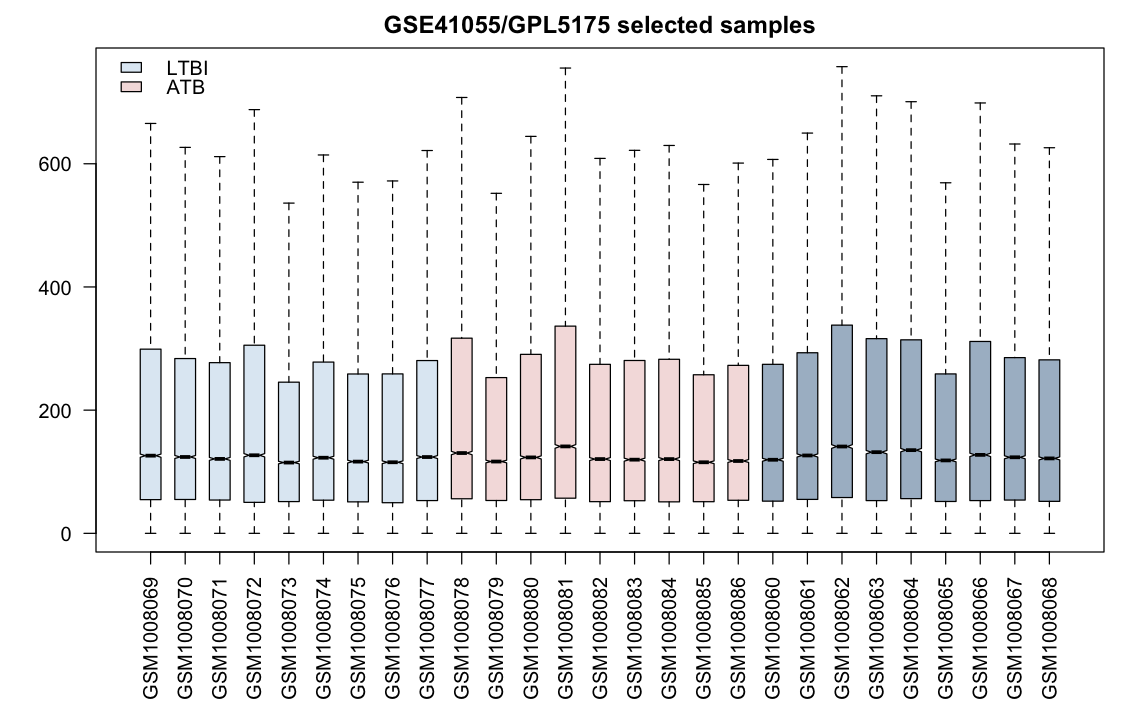

In [23]:
################################################################
#   Boxplot for selected GEO samples
library(Biobase)
library(GEOquery)
library(repr)

# load series and platform data from GEO

gset <- getGEO("GSE41055", GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL5175", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
gsms <- "XXXXXXXXX000000000111111111"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)
labels <- c("LTBI","ATB")

# set parameters and draw the plot
palette(c("#dfeaf4","#f4dfdf", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste ("GSE41055", '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

#### Run differential expression analysis between sample groups and export results as CSV file

In [25]:
# Version info: R 3.2.3, Biobase 2.30.0, GEOquery 2.40.0, limma 3.26.8
# R scripts generated  Wed Jun 10 18:21:49 EDT 2020

################################################################
#   Differential expression analysis with limma
library(Biobase)
library(GEOquery)
library(limma)

# load series and platform data from GEO

gset <- getGEO("GSE41055", GSEMatrix =TRUE, AnnotGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL5175", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# make proper column names to match toptable 
fvarLabels(gset) <- make.names(fvarLabels(gset))

# group names for all samples
gsms <- "XXXXXXXXX000000000111111111"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# log2 transform
ex <- exprs(gset)
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
          (qx[6]-qx[1] > 50 && qx[2] > 0) ||
          (qx[2] > 0 && qx[2] < 1 && qx[4] > 1 && qx[4] < 2)
if (LogC) { ex[which(ex <= 0)] <- NaN
  exprs(gset) <- log2(ex) }

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names
fl <- as.factor(sml)
gset$description <- fl
design <- model.matrix(~ description + 0, gset)
colnames(design) <- levels(fl)
fit <- lmFit(gset, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

write.csv(tT, paste(microarray_diff_exp_data , CSV_filename, sep=""))

Found 1 file(s)
GSE41055_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GSE41055_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.
File stored at: 
/var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GPL5175.soft


## Dataset 9

### GSE54992 China (microarray, GPL570)

- Subjects:39
- Disease status: tuberculosis (n=9), latent tuberculosis infection (n=6), TB patient after anti-tuberculosis treatment for 3 months (n=9), TB patient after anti-tuberculosis treatment for 6 months (n=9), and healthy donor (n=6)

Compare ATB (**n=9**) to LTBI (**n=6**)

In [30]:
CSV_filename <- "GSE54992.csv"

#### Check distribution of expression values across samples

Found 1 file(s)
GSE54992_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.


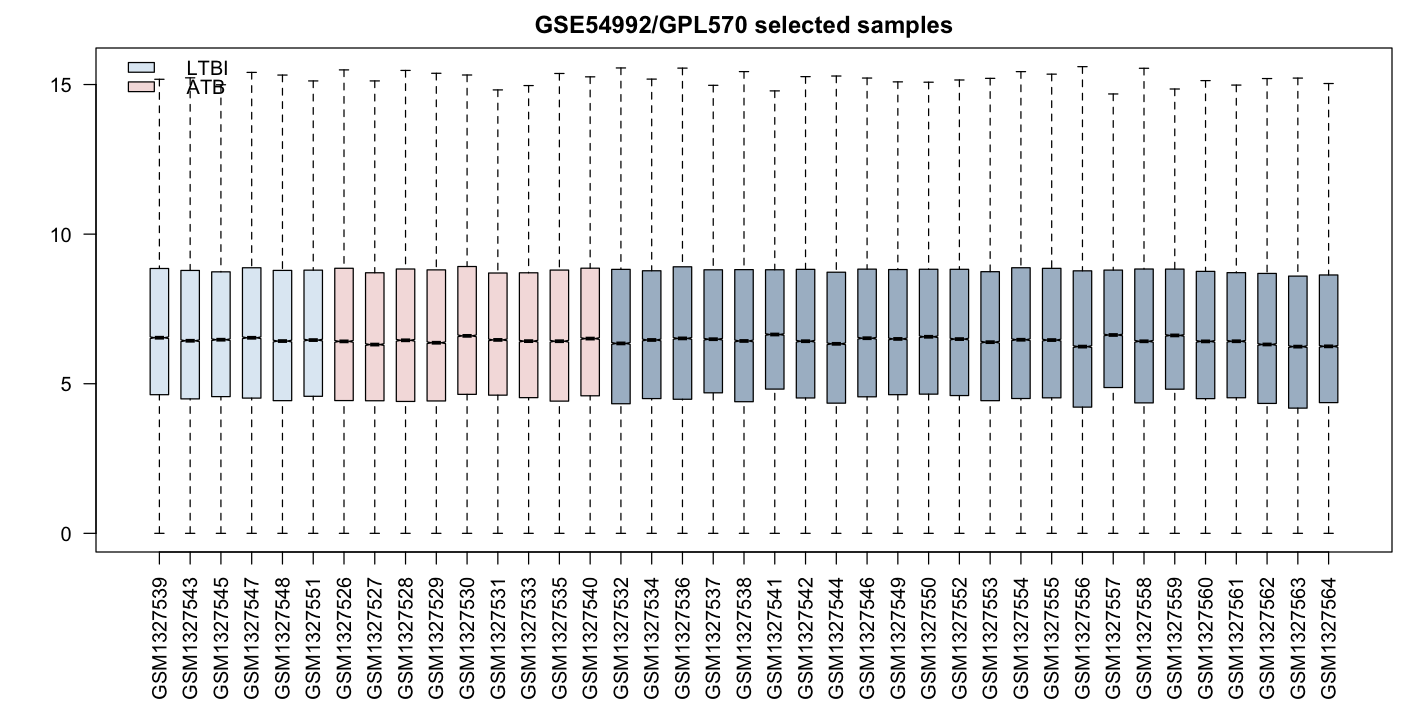

In [29]:
################################################################
#   Boxplot for selected GEO samples
library(Biobase)
library(GEOquery)
library(repr)

# load series and platform data from GEO

gset <- getGEO("GSE54992", GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL570", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
gsms <- "111111X1X1XXX01XX0X0X00XX0XXXXXXXXXXXXX"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)
labels <- c("LTBI","ATB")

# set parameters and draw the plot
palette(c("#dfeaf4","#f4dfdf", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste ("GSE54992", '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

#### Run differential expression analysis between sample groups and export results as CSV file

In [31]:
# Version info: R 3.2.3, Biobase 2.30.0, GEOquery 2.40.0, limma 3.26.8
# R scripts generated  Wed Jun 10 18:59:35 EDT 2020

################################################################
#   Differential expression analysis with limma
library(Biobase)
library(GEOquery)
library(limma)

# load series and platform data from GEO

gset <- getGEO("GSE54992", GSEMatrix =TRUE, AnnotGPL=TRUE)
if (length(gset) > 1) idx <- grep("GPL570", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# make proper column names to match toptable 
fvarLabels(gset) <- make.names(fvarLabels(gset))

# group names for all samples
gsms <- "111111X1X1XXX01XX0X0X00XX0XXXXXXXXXXXXX"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# log2 transform
ex <- exprs(gset)
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
          (qx[6]-qx[1] > 50 && qx[2] > 0) ||
          (qx[2] > 0 && qx[2] < 1 && qx[4] > 1 && qx[4] < 2)
if (LogC) { ex[which(ex <= 0)] <- NaN
  exprs(gset) <- log2(ex) }

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names
fl <- as.factor(sml)
gset$description <- fl
design <- model.matrix(~ description + 0, gset)
colnames(design) <- levels(fl)
fit <- lmFit(gset, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

write.csv(tT, paste(microarray_diff_exp_data , CSV_filename, sep=""))

Found 1 file(s)
GSE54992_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GSE54992_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
File stored at: 
/var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GPL570.annot.gz
Warning message:
“62 parsing failures.
  row             col           expected    actual         file
54614 Platform_SPOTID 1/0/T/F/TRUE/FALSE --Control literal data
54615 Platform_SPOTID 1/0/T/F/TRUE/FALSE --Control literal data
54616 Platform_SPOTID 1/0/T/F/TRUE/FALSE --Control literal data
54617 Platform_SPOTID 1/0/T/F/TRUE/FALSE --Control literal data
54618 Platform_SPOTID 1/0/T/F/TRUE/FALSE --Control literal data
..... ............... .................. ......... ............
See problems(...) for more details.
”

## Dataset 10

### GSE62525 Taiwanese (microarray, GPL16951)

- Subjects:21 (42 samples total)
- Two replicates included per subject 
- Disease status: active TB (n=14), latent TB infection (n=14), and healthy control (n=14)

Compare ATB (**n=14**) to LTBI (**n=14**)

In [38]:
CSV_filename <- "GSE62525.csv"

#### Check distribution of expression values across samples

Found 1 file(s)
GSE62525_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.


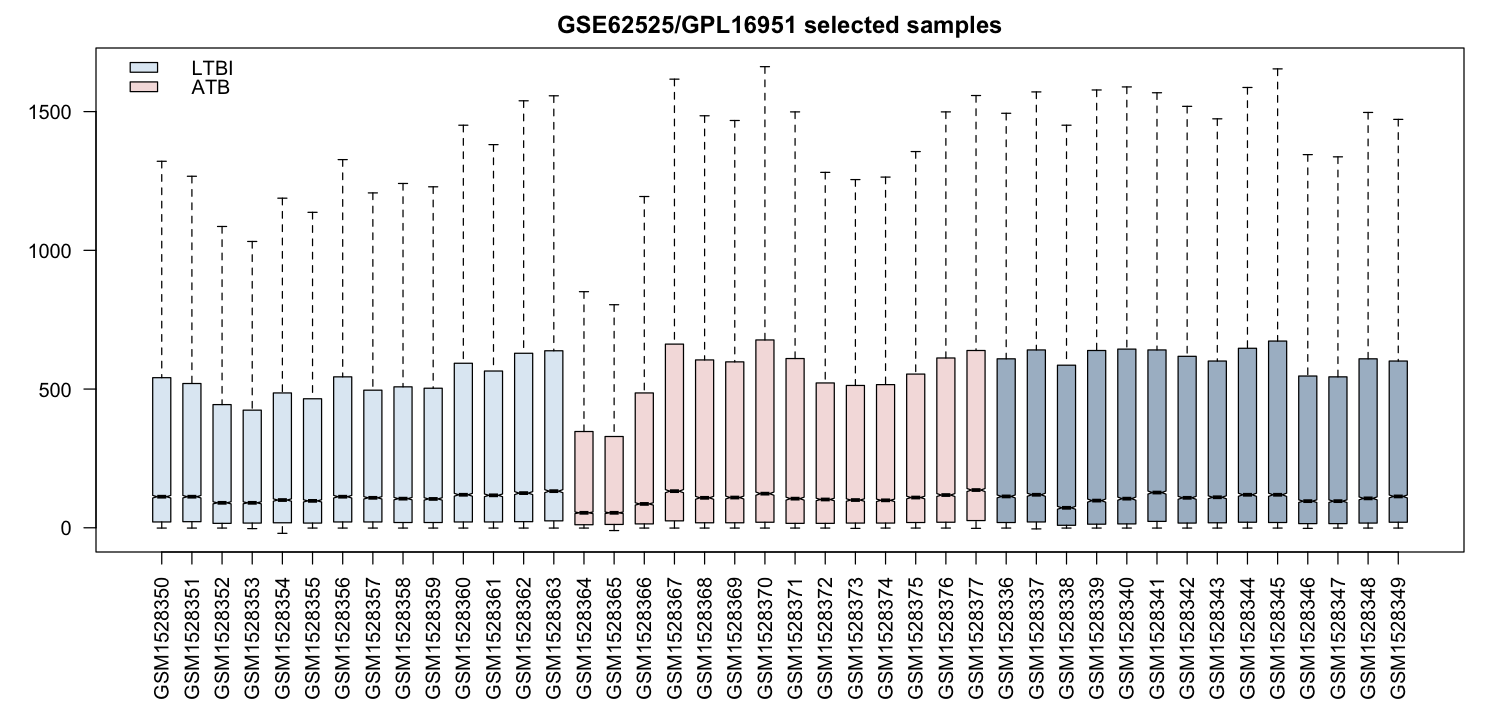

In [33]:
################################################################
#   Boxplot for selected GEO samples
library(Biobase)
library(GEOquery)
library(repr)

# load series and platform data from GEO

gset <- getGEO("GSE62525", GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL16951", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
gsms <- "XXXXXXXXXXXXXX0000000000000011111111111111"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)
labels <- c("LTBI","ATB")

# set parameters and draw the plot
palette(c("#dfeaf4","#f4dfdf", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste ("GSE62525", '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

#### Run differential expression analysis between sample groups and export results as CSV file

In [39]:
# Version info: R 3.2.3, Biobase 2.30.0, GEOquery 2.40.0, limma 3.26.8
# R scripts generated  Wed Jun 10 19:05:32 EDT 2020

################################################################
#   Differential expression analysis with limma
library(Biobase)
library(GEOquery)
library(limma)

# load series and platform data from GEO

gset <- getGEO("GSE62525", GSEMatrix =TRUE, AnnotGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL16951", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# make proper column names to match toptable 
fvarLabels(gset) <- make.names(fvarLabels(gset))

# group names for all samples
gsms <- "XXXXXXXXXXXXXX0000000000000011111111111111"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# log2 transform
ex <- exprs(gset)
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
          (qx[6]-qx[1] > 50 && qx[2] > 0) ||
          (qx[2] > 0 && qx[2] < 1 && qx[4] > 1 && qx[4] < 2)
if (LogC) { ex[which(ex <= 0)] <- NaN
  exprs(gset) <- log2(ex) }

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names
fl <- as.factor(sml)
gset$description <- fl
design <- model.matrix(~ description + 0, gset)
colnames(design) <- levels(fl)
fit <- lmFit(gset, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

write.csv(tT, paste(microarray_diff_exp_data , CSV_filename, sep=""))

Found 1 file(s)
GSE62525_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GSE62525_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL16951 found here:
/var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GPL16951.soft 
Warning message:
“Partial NA coefficients for 5 probe(s)”Warning message:
“Zero sample variances detected, have been offset away from zero”

## Dataset 11

### GSE69581 South Africa HIV infected latent/active TB patients (microarray, GPL10558)

- Subjects:50
- Disease status: Active (n=15), Latent (n=25), and Subclinical (n=10)
- Disease status definition: active: symptomatic microbiologically confirmed active pulmonary TB. Subclinical had pulmonary abnormalities consistent with subclinical disease and were significantly more likely to progress

Compare ATB (**n=15**) to LTBI (**n=25**)

In [42]:
CSV_filename <- "GSE69581.csv"

#### Check distribution of expression values across samples

Found 1 file(s)
GSE69581_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.


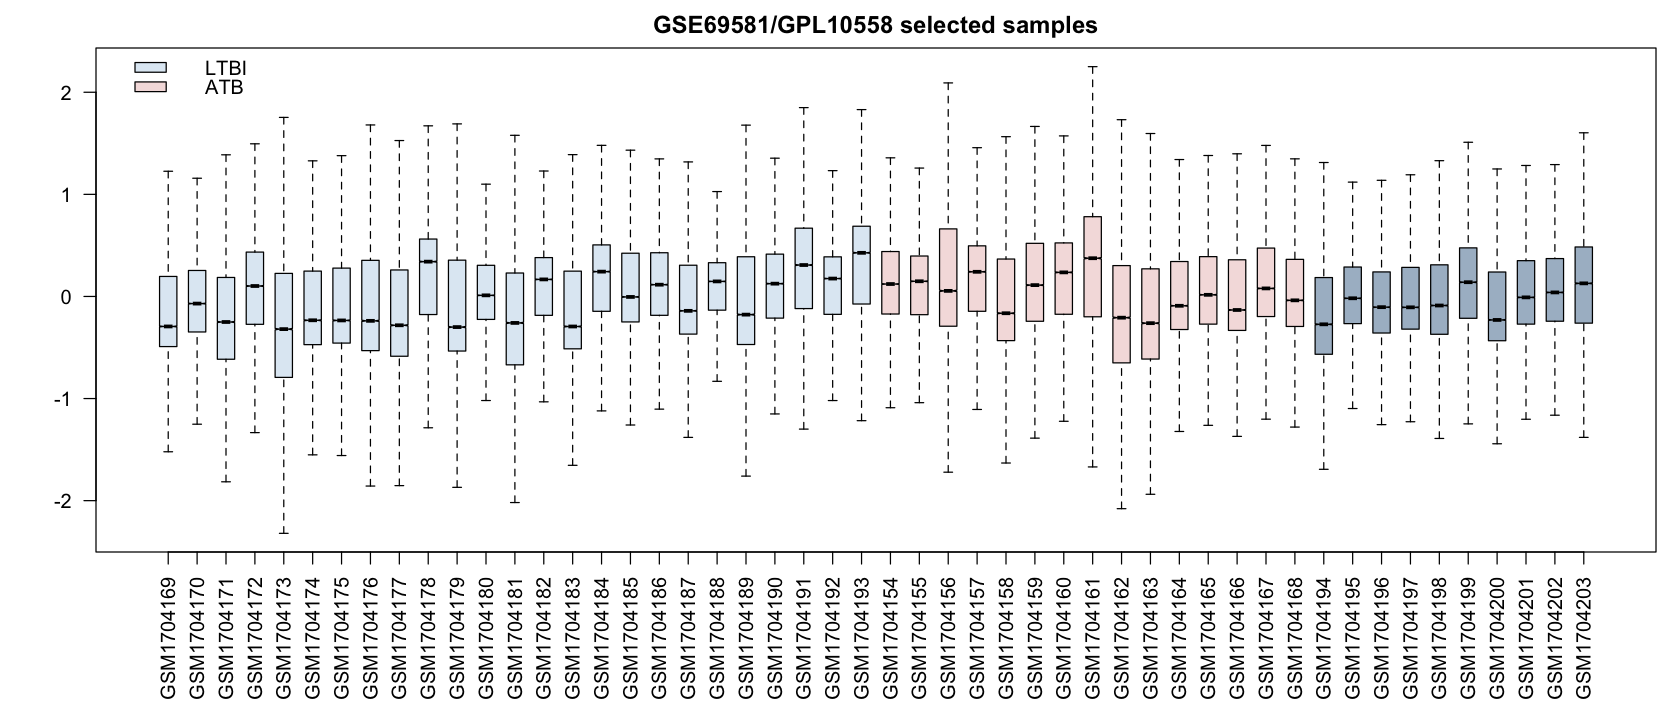

In [36]:
################################################################
#   Boxplot for selected GEO samples
library(Biobase)
library(GEOquery)
library(repr)

# load series and platform data from GEO

gset <- getGEO("GSE69581", GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL10558", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
gsms <- "1111111111111110000000000000000000000000XXXXXXXXXX"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)
labels <- c("LTBI","ATB")

# set parameters and draw the plot
palette(c("#dfeaf4","#f4dfdf", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste ("GSE69581", '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

#### Run differential expression analysis between sample groups and export results as CSV file

In [43]:
# Version info: R 3.2.3, Biobase 2.30.0, GEOquery 2.40.0, limma 3.26.8
# R scripts generated  Wed Jun 10 19:11:20 EDT 2020

################################################################
#   Differential expression analysis with limma
library(Biobase)
library(GEOquery)
library(limma)

# load series and platform data from GEO

gset <- getGEO("GSE69581", GSEMatrix =TRUE, AnnotGPL=TRUE)
if (length(gset) > 1) idx <- grep("GPL10558", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# make proper column names to match toptable 
fvarLabels(gset) <- make.names(fvarLabels(gset))

# group names for all samples
gsms <- "1111111111111110000000000000000000000000XXXXXXXXXX"
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# log2 transform
ex <- exprs(gset)
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
          (qx[6]-qx[1] > 50 && qx[2] > 0) ||
          (qx[2] > 0 && qx[2] < 1 && qx[4] > 1 && qx[4] < 2)
if (LogC) { ex[which(ex <= 0)] <- NaN
  exprs(gset) <- log2(ex) }

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names
fl <- as.factor(sml)
gset$description <- fl
design <- model.matrix(~ description + 0, gset)
colnames(design) <- levels(fl)
fit <- lmFit(gset, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

write.csv(tT, paste(microarray_diff_exp_data , CSV_filename, sep=""))

Found 1 file(s)
GSE69581_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GSE69581_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
Using locally cached version of GPL10558 found here:
/var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GPL10558.annot.gz 
Warning message:
“13 parsing failures.
  row     col               expected          actual         file
29686 Gene ID no trailing characters ///283507       literal data
29841 Gene ID no trailing characters ///2074         literal data
30401 Gene ID no trailing characters ///27185///7257 literal data
31184 Gene ID no trailing characters ///57592        literal data
31271 Gene ID no trailing characters ///3199         literal data
..... ....... ...................... ............... ............
See problems(...) for more details.
”

## Dataset 12

### GSE73408 US patients with TB and pneumonia  (microarray, GPL11532)

- Subjects:109
- Disease status: TB (n=35), LTBI (n=35), and PNA (pneumonia) (n=39)
- Disease status definition: TB, LTBI, and PNA (pneumonia)

Compare ATB (**n=35**) to LTBI (**n=35**)

In [44]:
CSV_filename <- "GSE73408.csv"

#### Check distribution of expression values across samples

Found 1 file(s)
GSE73408_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


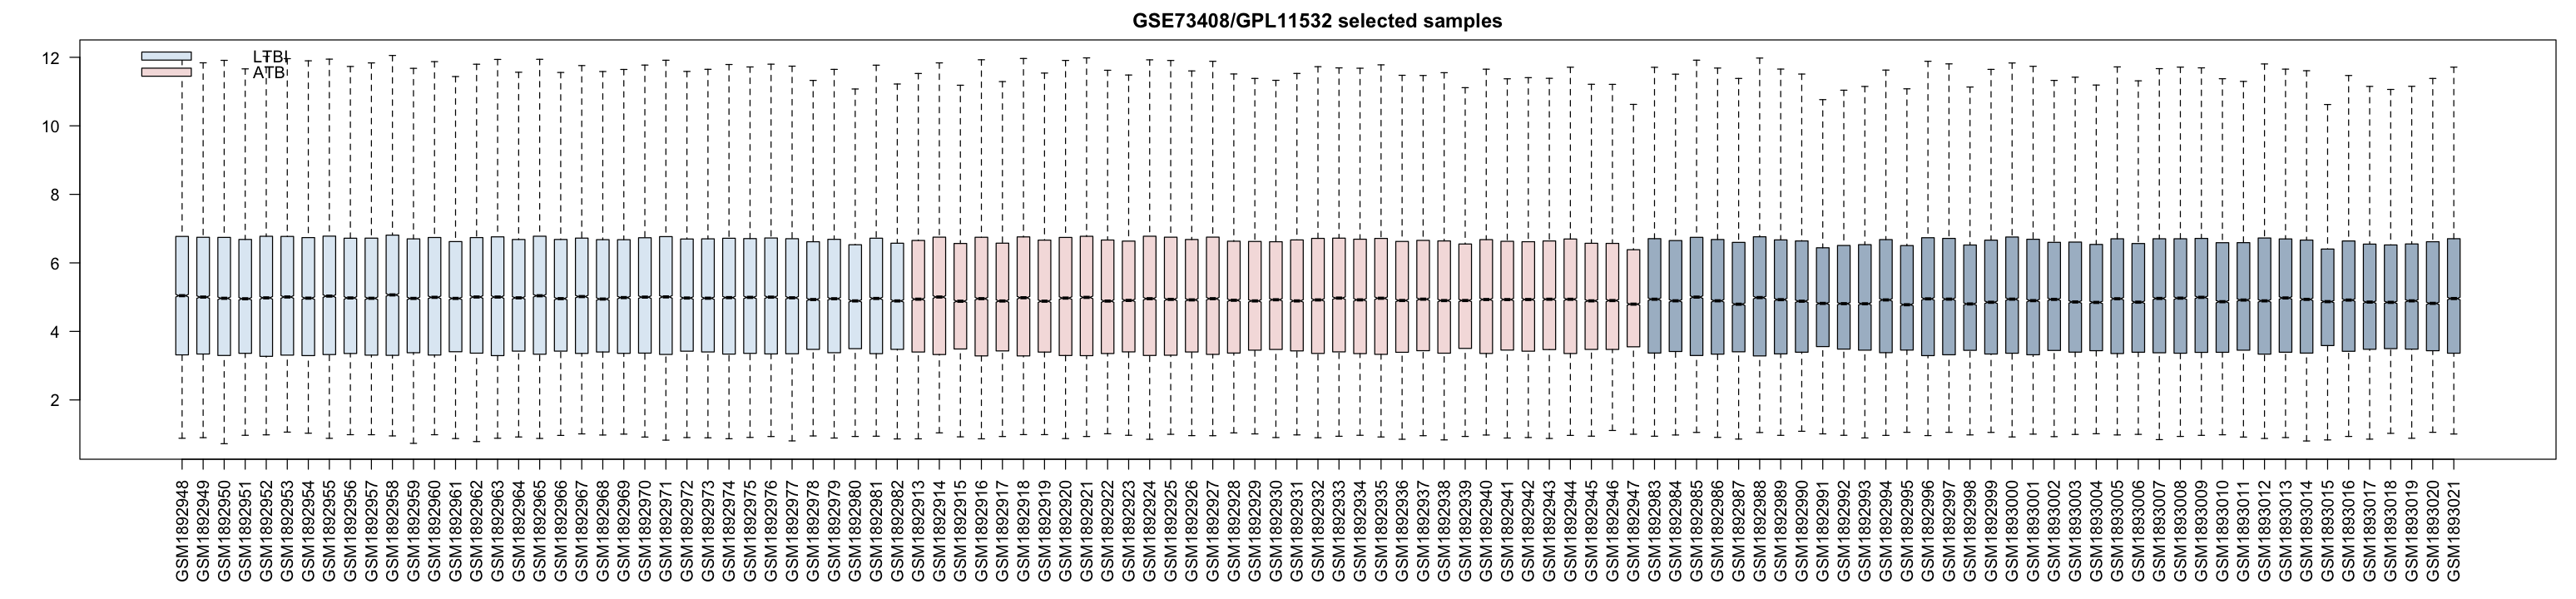

In [45]:
################################################################
#   Boxplot for selected GEO samples
library(Biobase)
library(GEOquery)
library(repr)

# load series and platform data from GEO

gset <- getGEO("GSE73408", GSEMatrix =TRUE, getGPL=FALSE)
if (length(gset) > 1) idx <- grep("GPL11532", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# group names for all samples in a series
gsms <- paste0("11111111111111111111111111111111111000000000000000",
        "00000000000000000000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXX")
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }
sml <- paste("G", sml, sep="")  # set group names

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# order samples by group
ex <- exprs(gset)[ , order(sml)]
sml <- sml[order(sml)]
fl <- as.factor(sml)
labels <- c("LTBI","ATB")

# set parameters and draw the plot
palette(c("#dfeaf4","#f4dfdf", "#AABBCC"))
options(repr.plot.width=4+dim(gset)[[2]]/5, repr.plot.height=6)
par(mar=c(2+round(max(nchar(sampleNames(gset)))/2),4,2,1))
title <- paste ("GSE73408", '/', annotation(gset), " selected samples", sep ='')
boxplot(ex, boxwex=0.6, notch=T, main=title, outline=FALSE, las=2, col=fl)
legend("topleft", labels, fill=palette(), bty="n")

#### Run differential expression analysis between sample groups and export results as CSV file

In [46]:
# Version info: R 3.2.3, Biobase 2.30.0, GEOquery 2.40.0, limma 3.26.8
# R scripts generated  Wed Jun 10 19:17:12 EDT 2020

################################################################
#   Differential expression analysis with limma
library(Biobase)
library(GEOquery)
library(limma)

# load series and platform data from GEO

gset <- getGEO("GSE73408", GSEMatrix =TRUE, AnnotGPL=TRUE)
if (length(gset) > 1) idx <- grep("GPL11532", attr(gset, "names")) else idx <- 1
gset <- gset[[idx]]

# make proper column names to match toptable 
fvarLabels(gset) <- make.names(fvarLabels(gset))

# group names for all samples
gsms <- paste0("11111111111111111111111111111111111000000000000000",
        "00000000000000000000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXX")
sml <- c()
for (i in 1:nchar(gsms)) { sml[i] <- substr(gsms,i,i) }

# eliminate samples marked as "X"
sel <- which(sml != "X")
sml <- sml[sel]
gset <- gset[ ,sel]

# log2 transform
ex <- exprs(gset)
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
          (qx[6]-qx[1] > 50 && qx[2] > 0) ||
          (qx[2] > 0 && qx[2] < 1 && qx[4] > 1 && qx[4] < 2)
if (LogC) { ex[which(ex <= 0)] <- NaN
  exprs(gset) <- log2(ex) }

# set up the data and proceed with analysis
sml <- paste("G", sml, sep="")    # set group names
fl <- as.factor(sml)
gset$description <- fl
design <- model.matrix(~ description + 0, gset)
colnames(design) <- levels(fl)
fit <- lmFit(gset, design)
cont.matrix <- makeContrasts(G1-G0, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort="none" , n=Inf)

write.csv(tT, paste(microarray_diff_exp_data , CSV_filename, sep=""))

Found 1 file(s)
GSE73408_series_matrix.txt.gz
Using locally cached version: /var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GSE73408_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.
File stored at: 
/var/folders/qd/wxnxvl1j6x50wp2tn6rml2km0000gn/T//RtmpV1Z6Ky/GPL11532.annot.gz


# **RNA-seq Data**

## Dataset 13

### GSE84076 Brazil, >18 year-old  (Sequencing, GPL16791)

- Subjects:36
- Disease status: Active Tuberculosis (n=6), Treated Active Tuberculosis (n=2), Latent Tuberculosis - BCG - Unvaccinated/vaccinated (n=16) and Control - BCG - Unvaccinated/vaccinated (n=12)
- Disease status definition: using Cufflinks for normalization
- rawcount = *no*

Compare ATB (**n=9**) to LTBI (**n=6**)

In [ ]:
CSV_filename <- "GSE84076.csv"

#### Check distribution of expression values across samples

## Dataset 14

### GSE101705  South Indian cohort  (Sequencing, GPL18573)

- Subjects:44
- Disease status: TB (n=28), latent TB infection (n=16)
- Disease status definition: DEseq2 normalization
- rawcount = *no*

Compare ATB (**n=28**) to LTBI (**n=16**)

In [ ]:
CSV_filename <- "GSE101705.csv"

#### Check distribution of expression values across samples

## Dataset 15 [Combine two datasets together]

### GSE107995: GSE107993  Leicester cohort - non-progressor individuals (Sequencing, GPL20301)

- Subjects:138
- Disease status: Control (n=69), LTBI (n=69)
- rawcount = *yes*

### GSE107995: GSE107994  Leicester cohort - progressor individuals (Sequencing, GPL20301)

- Subjects:175
- Disease status:  Active_TB (n=53), LTBI_Progressor (n=23), Control (n=50), LTBI (n=49)
- Disease status definition: LTBI_Progressor samples is longitudnal datasets ranged from baseline (latent infection) to active TB diagnosed.Longitudinal data is in a low TB incidence setting.
- rawcount = *yes*

Compare ATB (**n=53**) to LTBI (**n=118**)

In [ ]:
CSV_filename <- "GSE107995.csv"

#### Check distribution of expression values across samples